## Analysis Part 2

<ul style="font-size:20px;">
    <li> EDA</li>
    <li> Find a way to see the top technical skills required</li>
    <li> Find key requirements</li>
    <li> Find education level requirements</li>
    <li> Find key responsibilities</li>

</ul>

In [39]:
# library import 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import pprint

In [40]:
pp = pprint.PrettyPrinter(indent=4)


In [41]:
# reading data 

df = pd.read_csv("../text_to_df/uk_jobs.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ids              461 non-null    int64 
 1   title            461 non-null    object
 2   company          461 non-null    object
 3   location         461 non-null    object
 4   text             461 non-null    object
 5   seniority_level  447 non-null    object
 6   industry         459 non-null    object
 7   employment_type  457 non-null    object
 8   job_function     461 non-null    object
dtypes: int64(1), object(8)
memory usage: 32.5+ KB


In [43]:
df.head()

,ids,title,company,location,text,seniority_level,industry,employment_type,job_function
0,210,Junior Data Science Specialist (6 Month FTC),Asda,"Leeds, England, United Kingdom",Job Advert Do you have an analytics and data ...,Entry level,Staffing & Recruiting Retail Financial Services,Full-time,Engineering Information Technology
1,17,Data Scientist,MAGO,"Manchester Airport, England, United Kingdom",Posted by Chris Joynson (he/ him) Head of Digi...,Mid-Senior level,Airlines/Aviation,Full-time,Information Technology
2,47,Data Scientist,DataCamp,"London, England, United Kingdom",About DataCamp DataCamp is building the best p...,Mid-Senior level,E-learning,Full-time,Analyst
3,91,Data Scientist - Manchester,MAG (Airports Group),"Manchester, England, United Kingdom","We are proud to be a diverse employer, and we ...",Entry level,Marketing & Advertising Internet Financial Ser...,Full-time,Engineering Information Technology
4,212,Aspire Data Scientist,Landsec,"London, England, United Kingdom",Purpose of job As the availability of data bec...,Entry level,Retail Financial Services Real Estate,Full-time,Engineering Information Technology


In [44]:
print("Top 10 job titles: ")
df.title.value_counts()[:10]

Top 10 job titles: 


Data Scientist               122
Data Engineer                 14
Machine Learning Engineer     12
Senior Data Scientist         12
Data Analyst                   8
Junior Data Scientist          7
Principal Data Scientist       5
Data Scientist - Remote        3
Data Science Engineer          3
Lead Data Scientist            3
Name: title, dtype: int64

In [45]:
# top 5 locations
df.location.str.split(",").apply(lambda x: x[0]).value_counts()[:5]

London            238
United Kingdom     15
Cambridge          14
Edinburgh          13
Manchester         11
Name: location, dtype: int64

In [79]:
# new dataframe with only data science jobs
df_ds = df[df.title.str.contains('Data')].copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ids              461 non-null    int64 
 1   title            461 non-null    object
 2   company          461 non-null    object
 3   location         461 non-null    object
 4   text             461 non-null    object
 5   seniority_level  447 non-null    object
 6   industry         459 non-null    object
 7   employment_type  457 non-null    object
 8   job_function     461 non-null    object
dtypes: int64(1), object(8)
memory usage: 32.5+ KB


In [80]:
# check for null values
df_ds.isnull().sum()

ids                 0
title               0
company             0
location            0
text                0
seniority_level    13
industry            2
employment_type     4
job_function        0
dtype: int64

In [81]:
# three columns are desired
desired_columns = ["ids", "title", "text"]
df_ds = df_ds[desired_columns]
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 459
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ids     403 non-null    int64 
 1   title   403 non-null    object
 2   text    403 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.6+ KB


## Segmentation

In [82]:
def get_text_titles(text):
    text = text.split("  ")
    return text
    

In [130]:
example =df_ds.text[7]
full_text = get_text_titles(example)

In [131]:
# get titles & their index in the full_texzt
titles = [title for title in full_text if len(title.split()) <=5 ]
titles_index = [full_text.index(i) for i in titles]

In [132]:
titles_index

[1, 2, 4, 7]

In [133]:
titles

['Data Scientist',
 'About This Role',
 'What You’ll Do',
 "Where and how you'll work"]

In [134]:
# each segment title as key, and the joined text that follows as the value
segment_dict = { }
for i in range(len(titles) - 1):
    segment_dict[titles[i]] = ' '.join(full_text[titles_index[i]+1:titles_index[i+1]])

# the last item of the titles 
segment_dict[titles[-1]] = ' '.join(full_text[titles_index[-1]+1:])

In [135]:
segment_dict.keys()

dict_keys(['Data Scientist', 'About This Role', 'What You’ll Do', "Where and how you'll work"])

In [72]:
pd.DataFrame([segment_dict])

,The Business,The Role,You:,What are we offering?,Reasonable Adjustments
0,MAGO is a truly agile eCommerce business that ...,As one of our Data Scientists you will be clos...,"Degree qualified, and with a passion for data ...",A company that is inclusive and tolerant to al...,"As an inclusive employer, MAG wants to see eve..."


In [20]:
pp.pprint(segment_dict.items())

{   'About This Role': 'Our Data Science function is a team focused on solving '
                       'unique business problems, developing insights and '
                       'driving actions through the analysis of complex data. '
                       'We are a talented and collaborative team who leverage '
                       'the skillsets of others to support delivery. For this '
                       'role, we are particularly interested in seeing '
                       'candidates who have a passion for the statistical '
                       'aspects of Data Science.',
    'Data Scientist': '',
    'What You’ll Do': 'You’ll delve into complex data science challenges '
                      'through: Analysing data, building and maintaining '
                      'machine learning models which form the heart of the '
                      'business. Using a combination of business acumen, '
                      'coding and new technologies to navigate through larg

In [123]:
def text_split_len(text):
    return len(text.split("  "))

In [124]:
df_ds["len_double_space"] = df.text.apply(text_split_len)

In [126]:
# get ids of documents with less than 3 to modify
ids_less_3 = df_ds[df_ds.len_double_space < 3].ids.to_list()
print(ids_less_3)

[253, 160, 115]


In [128]:
df_ds.drop(ids_less_3, inplace=True)

In [129]:
df_ds

,ids,title,text,len_double_space,len_new_line
0,210,Junior Data Science Specialist (6 Month FTC),Job Advert Do you have an analytics and data ...,10,1
1,17,Data Scientist,Posted by Chris Joynson (he/ him) Head of Digi...,18,1
2,47,Data Scientist,About DataCamp DataCamp is building the best p...,8,1
3,91,Data Scientist - Manchester,"We are proud to be a diverse employer, and we ...",14,1
4,212,Aspire Data Scientist,Purpose of job As the availability of data bec...,16,1
...,...,...,...,...,...
454,319,Data Engineer - AI & ML,Posted by Lucy Henson Scaling Up Europe's Fast...,30,1
455,114,Data Scientist,Job Title:Data Scientist Short Description: Lo...,7,1
457,242,Data Scientist - UK,About MOLOCO MOLOCO is a machine learning com...,8,1
458,228,Data Scientist,What It's Like To Work At Landmark We're a fr...,10,1


## Text Preprocessing

In [153]:
import nltk
import string

#Checking the frequency distribution before stopword removal
from nltk.probability import FreqDist

In [200]:
processing_df = df_ds.copy(deep=True)
processing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 459
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ids               400 non-null    int64 
 1   title             400 non-null    object
 2   text              400 non-null    object
 3   len_double_space  400 non-null    int64 
 4   len_new_line      400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 18.8+ KB


In [201]:
processing_df['text'] = processing_df.text.str.lower()

In [202]:
processing_df.head()

,ids,title,text,len_double_space,len_new_line
0,210,Junior Data Science Specialist (6 Month FTC),job advert do you have an analytics and data ...,10,1
1,17,Data Scientist,posted by chris joynson (he/ him) head of digi...,18,1
2,47,Data Scientist,about datacamp datacamp is building the best p...,8,1
3,91,Data Scientist - Manchester,"we are proud to be a diverse employer, and we ...",14,1
4,212,Aspire Data Scientist,purpose of job as the availability of data bec...,16,1


In [203]:
def remove_punctuation(text):
    return ''.join(char for char in text if char not in string.punctuation)

In [204]:
processing_df['text']= processing_df.text.apply(remove_punctuation)

In [205]:
# check values
#processing_df.loc[1, 'text']

In [206]:
# frequency distn before stopward removal. 
full_text = '\n'.join(text for text in processing_df.text)


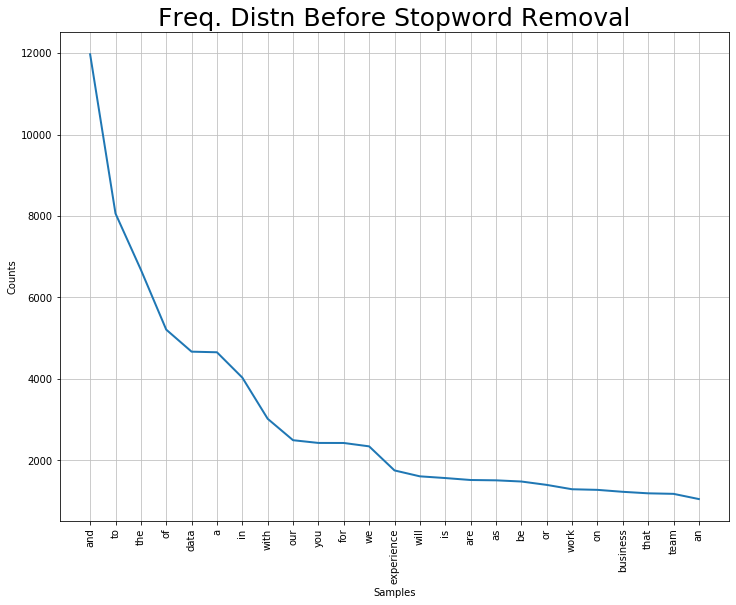

In [207]:

fdist = FreqDist(full_text.split())
plt.figure(figsize=(12,9))
plt.title('Freq. Distn Before Stopword Removal', fontdict={'fontsize': 25})

freq_plot = fdist.plot(25)



### Removing stopwords

In [208]:
from nltk.corpus import stopwords

In [214]:
stop_words = stopwords.words('english')
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words).replace("  ", ' ')

In [216]:
processing_df['text'] = processing_df.text.apply(remove_stopwords)

In [217]:
processing_df.head(10)

,ids,title,text,len_double_space,len_new_line
0,210,Junior Data Science Specialist (6 Month FTC),job advert analytics data science background l...,10,1
1,17,Data Scientist,posted chris joynson head digital talent acqui...,18,1
2,47,Data Scientist,datacamp datacamp building best platform learn...,8,1
3,91,Data Scientist - Manchester,proud diverse employer welcome candidates back...,14,1
4,212,Aspire Data Scientist,purpose job availability data becomes prevalen...,16,1
5,229,Data Scientist - Client Insights Unit (CIU) - ...,looking role focused recently formed ciu data ...,16,1
6,191,Product Data Scientist,posted nick wright associate director head dat...,5,1
7,239,Data Scientist,nottingham trent house 95002 united kingdom no...,24,1
8,410,Senior Data Scientist | Contract (12 months),posted nicolas j 2nd hiring top talent assembl...,26,1
9,6,Information Fusion & Data Science Consultant,description people heart reason clients work u...,17,1


In [218]:
full_text2 = '\n'.join(text for text in processing_df.text)

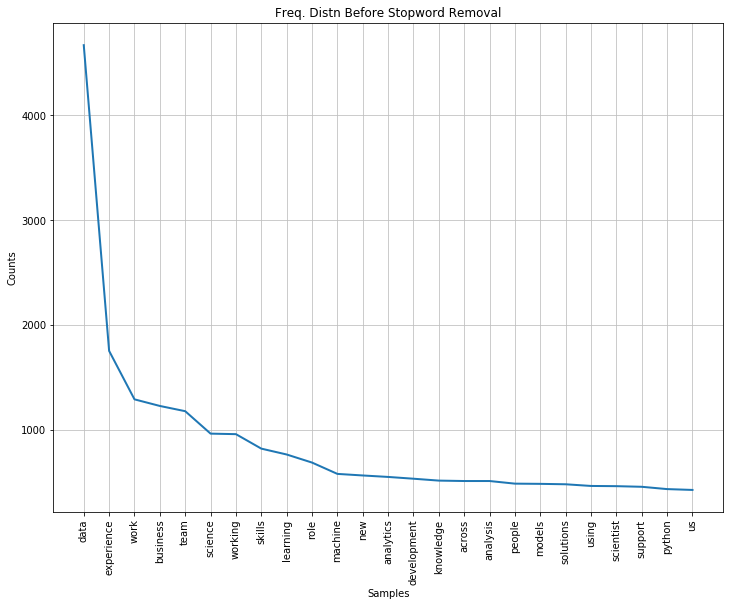

In [220]:
fdist2 = FreqDist(full_text2.split())
plt.figure(figsize=(12,9))
plt.title("Freq. Distn Before Stopword Removal")
fdist2.plot(25)

In [221]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '